<a href="https://colab.research.google.com/github/sheebajosetj/Linear-Regression/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Linear Regression Algorithm

Linear regression calculates an intercept and slope (weights) for a line that minimizes the sum of squared errors between the line and the data points.

The formula for linear regression is as follows:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

where $y$ is the target variable, $\beta_0$ is the intercept, $\beta_1$ to $\beta_n$ are the weights, and $x_1$ to $x_n$ are the features.

The algorithm is as follows:

- Initialize the weights.
- Calculate the predicted values.
- Calculate the error.
- Update the weights.
- Repeat the steps above until convergence.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load anscombe's quartet
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
anscombe = (pd.DataFrame({'x': x, 'y1': y1, 'y2': y2, 'y3': y3, 'x4': x4, 'y4': y4})
            )

anscombe

,x,y1,y2,y3,x4,y4
0,10,8.04,9.14,7.46,8,6.58
1,8,6.95,8.14,6.77,8,5.76
2,13,7.58,8.74,12.74,8,7.71
3,9,8.81,8.77,7.11,8,8.84
4,11,8.33,9.26,7.81,8,8.47
5,14,9.96,8.10,8.84,8,7.04
6,6,7.24,6.13,6.08,8,5.25
7,4,4.26,3.10,5.39,19,12.50
8,12,10.84,9.13,8.15,8,5.56
9,7,4.82,7.26,6.42,8,7.91


<Axes: xlabel='x', ylabel='y1'>

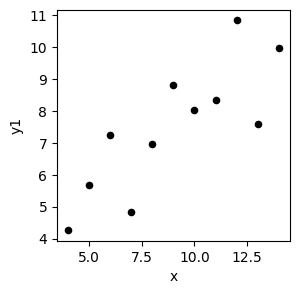

In [ ]:
# plot x y1
fig, ax = plt.subplots(figsize=(3, 3))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')

Let's run the algorithm on x and y1

Calculate the slope:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

Calculate the intercept:

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

Model Equation:

$$y = \beta_0 + \beta_1 x$$

In [ ]:
# slope

x1 = anscombe['x']
y1 = anscombe['y1']
slope = ((x1 - x1.mean())*(y1 - y1.mean())).sum() / ((x1 - x1.mean())**2).sum()
slope

np.float64(0.5000909090909091)

In [ ]:
# intercept

intercept = y1.mean() - slope * x1.mean()
intercept

np.float64(3.0000909090909103)

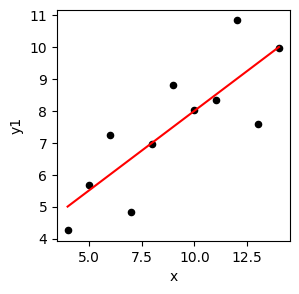

In [ ]:
# plot x y1
fig, ax = plt.subplots(figsize=(3, 3))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
x1 = np.linspace(4, 14, 100)
y1 = slope * x1 + intercept
ax.plot(x1, y1, color='r')

In [ ]:
# If someone said I got a value of  x 10 it will go quick up here in the x axis of 10 and then check whats the y from that

## Examples with Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

x1 = anscombe[['x']]#Sckit learn wants this as a dataframe if we use single double brackets it will consider as a column and not as a dataframe
y1 = anscombe['y1']
y2 = anscombe['y2']
y3 = anscombe['y3']

lr1 = LinearRegression()
lr1.fit(x1, y1)



LinearRegression()

In [ ]:
lr1.coef_ # When things that are in the underscore they are things that they learnt from fitting

array([0.50009091])

In [ ]:
lr1.intercept_

np.float64(3.0000909090909094)

In [ ]:
lr2 = LinearRegression()
lr2.fit(x1, y2)
lr3 = LinearRegression()
lr3.fit(x1, y3)

LinearRegression()

(3.0, 13.0)

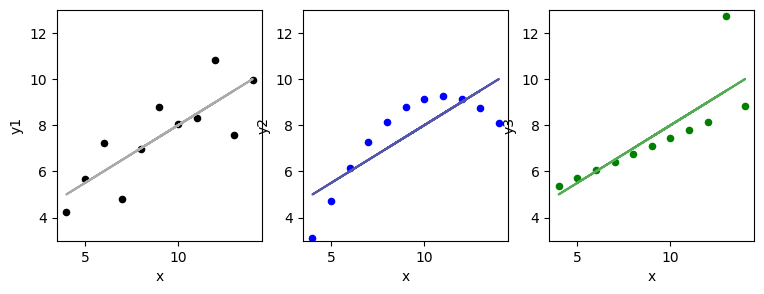

In [ ]:
# plot 1, 2 and 3 in different colors
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
anscombe.plot.scatter(x='x', y='y1', ax=axs[0], color='k')
axs[0].plot(x1, lr1.predict(x1), color='#aaa')
axs[0].set_ylim(3, 13)
anscombe.plot.scatter(x='x', y='y2', ax=axs[1], color='b')
axs[1].plot(x1, lr2.predict(x1), color='#55a')
axs[1].set_ylim(3, 13)
anscombe.plot.scatter(x='x', y='y3', ax=axs[2], color='g')
axs[2].plot(x1, lr3.predict(x1), color='#5a5')
axs[2].set_ylim(3, 13)

## Real world example with Aircraft Elevators

From website: This data set is also obtained from the task of controlling a F16 aircraft, although the target variable and attributes are different from the ailerons domain. In this case the goal variable is related to an action taken on the elevators of the aircraft.


In [ ]:
# https://www.openml.org/search?type=data&sort=runs&id=216&satatus=active
from datasets import load_dataset
elevators = load_dataset('inria-soda/tabular-benchmark', data_files='reg_num/elevators.csv')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

elevators.csv: 0.00B [00:00, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
elev = elevators['train'].to_pandas()
elev


,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime3,Sa,Goal
0,118.0,-55.0,-0.28,-0.08,-0.2,-11.0,11.0,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.031
1,390.0,-45.0,-0.06,-0.07,-0.6,-12.0,11.0,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,-0.0008,0.034
2,68.0,6.0,0.11,0.15,0.6,-10.0,-9.0,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,-0.0010,0.033
3,-358.0,-12.0,-0.20,0.13,-0.3,-11.0,-7.0,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.032
4,-411.0,-19.0,-0.18,0.02,-0.5,-11.0,-3.0,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,299.0,-28.0,0.08,-0.12,-0.3,-9.0,15.0,0.010,-0.2,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.027
16595,84.0,0.0,0.14,0.14,1.1,-8.0,-11.0,-0.014,-0.6,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.026
16596,-208.0,-6.0,-0.48,0.09,0.2,-9.0,-7.0,-0.010,-0.1,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.023
16597,-146.0,-14.0,-0.38,-0.03,-0.8,-10.0,10.0,0.010,-1.0,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.022


In [ ]:
X = elev.drop(columns=['Goal'])
y = elev['Goal']

lr_elev = LinearRegression()
lr_elev.fit(X, y)

LinearRegression()

In [ ]:
lr_elev.coef_


array([ 3.27106569e-06,  5.61529798e-06,  3.74004651e-03,  8.61939078e-04,
        2.58585645e-07,  1.64094801e-03, -6.34098825e-05,  5.36145023e-01,
       -1.13260740e-04, -5.64354233e+00, -1.61724342e+01,  1.25585077e+01,
       -6.89690670e+00,  2.49509111e+00,  4.87181641e+00, -1.33860695e+01])

In [ ]:
lr_elev.intercept_

np.float64(0.017687503848070364)

<Axes: >

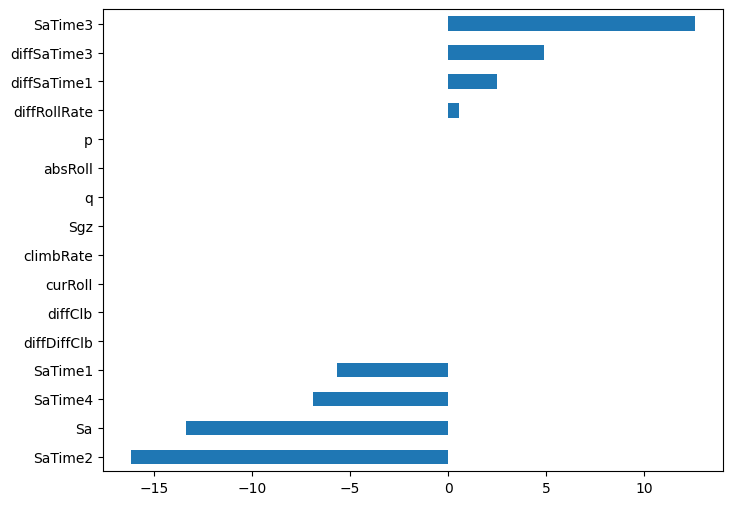

In [ ]:
pd.Series(lr_elev.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [ ]:
# score is R^2 - the proportion of variance explained by the model
lr_elev.score(X, y)

0.8134729462382582

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y, lr_elev.predict(X)), mean_squared_error(y, lr_elev.predict(X))

(0.0019882938133036223, 8.41542198511219e-06)

In [ ]:
lr_elev.predict(X.iloc[[0]])

array([0.03014431])

In [ ]:
y.iloc[0]

np.float64(0.031)

## Assumptions of Linear Regression

- Linear relationship between the features and target variable
- No multicollinearity - no correlation between the features
- Homoscedasticity - the variance of the residuals is the same for all values of the target variable
- No outliers - the residuals are normally distributed

Also, generally you will want to scale the features before running linear regression.

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.46758883, -1.65891499, -0.86946763, ...,  0.10706947,
         0.05862429, -0.59307754],
       [ 1.44746791, -1.26581851, -0.16081329, ...,  0.10706947,
         0.05862429, -0.10579872],
       [ 0.287464  ,  0.73897355,  0.38678324, ..., -2.21007018,
         0.05862429, -0.59307754],
       ...,
       [-0.70682508,  0.26725777, -1.51369884, ...,  0.10706947,
         0.05862429, -0.34943813],
       [-0.48347028, -0.04721942, -1.19158323, ...,  0.10706947,
         0.05862429,  0.62511953],
       [ 1.05839828,  0.07070953,  0.35457168, ...,  0.10706947,
         0.05862429,  0.86875894]])

In [ ]:
X_scaled.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
lr_std = LinearRegression()
lr_std.fit(X_scaled, y)
lr_std.score(X_scaled, y)

0.8134729462382582

<Axes: >

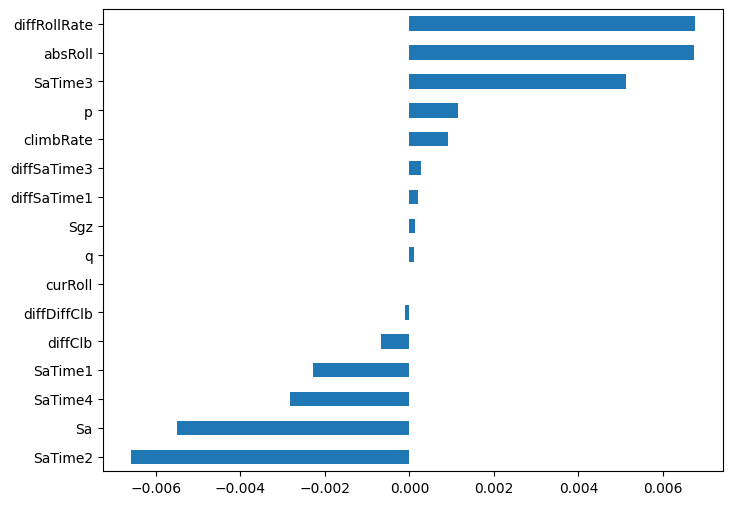

In [ ]:
pd.Series(lr_std.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [ ]:
!pip install xgboost

In [ ]:
# try with XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)
xgb.score(X, y)

0.9542744875539696

## Challenge: Linear Regression

Make a model to predict how much Titanic passengers paid for their tickets with Linear Regression. (Only use the numeric columns for the model.)

In [ ]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/titanic3.xls'
raw = pd.read_excel(url)
raw

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Solution: Linear Regression

In [ ]:
def tweak_titanic(df):
  return (df
          .loc[:, ['pclass', 'survived',  'age', 'sibsp', 'parch',
       'fare']]
        .dropna()
  )

tweak_titanic(raw)

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500
...,...,...,...,...,...,...
1301,3,0,45.5000,0,0,7.2250
1304,3,0,14.5000,1,0,14.4542
1306,3,0,26.5000,0,0,7.2250
1307,3,0,27.0000,0,0,7.2250


In [ ]:
#predict fare from numeric columns

X = tweak_titanic(raw).drop(columns=['fare'])
y = tweak_titanic(raw)['fare']

In [ ]:
#make linear regression model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
lr.score(X, y)

0.3813996165622603

In [ ]:
xgb = XGBRegressor()
xgb.fit(X, y)
xgb.score(X, y)

#This model performs better

0.832020062826214